In [1]:
import pandas as pd
import numpy as np

In [2]:
car_data = pd.read_csv("data.csv")

In [3]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
car_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
target = "MSRP"

In [8]:
car_data["Age"] = car_data["Year"].max() - car_data["Year"]
base = ["Age", "Engine HP", "Engine Cylinders", "Number of Doors", "highway MPG", "city mpg", "Popularity"]

In [9]:
car_data['Transmission Type'].value_counts()

Transmission Type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [10]:
for v in ['AUTOMATIC', 'MANUAL', 'AUTOMATED_MANUAL']:
    feature = f"is_transmission_{v}"
    car_data[feature] = (car_data['Transmission Type'] == v).astype(int)
    base.append(feature)

In [11]:
base.append(target)

In [12]:
car_data[base].sample(3)

,Age,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,is_transmission_AUTOMATIC,is_transmission_MANUAL,is_transmission_AUTOMATED_MANUAL,MSRP
698,7,631.0,12.0,4.0,16,10,67,1,0,0,506500
10520,9,185.0,6.0,4.0,24,17,210,1,0,0,23520
7005,11,200.0,6.0,4.0,23,16,586,1,0,0,28515


In [13]:
price_mean = np.mean(car_data[target])
np.log1p(price_mean)

np.float64(10.611418340866752)

<Axes: xlabel='MSRP', ylabel='Count'>

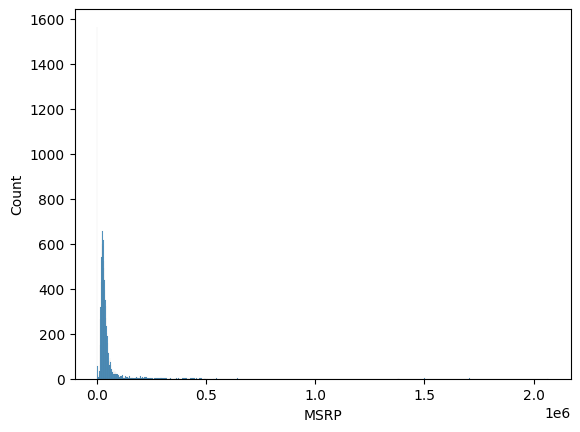

In [14]:
sns.histplot(car_data[target])

<Axes: xlabel='MSRP', ylabel='Count'>

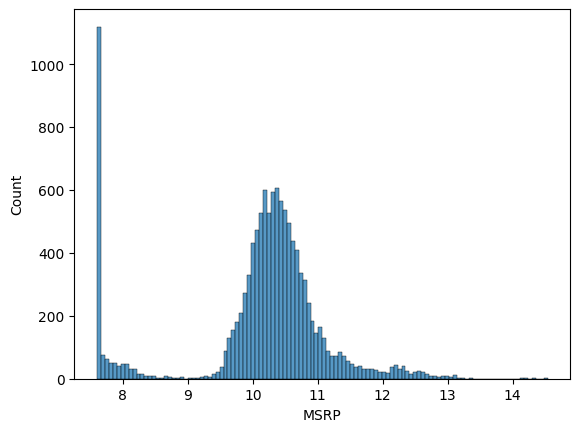

In [15]:
# log plot
sns.histplot(np.log1p(car_data[target]))

In [16]:
data = car_data[base]
data.head()

,Age,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,is_transmission_AUTOMATIC,is_transmission_MANUAL,is_transmission_AUTOMATED_MANUAL,MSRP
0,6,335.0,6.0,2.0,26,19,3916,0,1,0,46135
1,6,300.0,6.0,2.0,28,19,3916,0,1,0,40650
2,6,300.0,6.0,2.0,28,20,3916,0,1,0,36350
3,6,230.0,6.0,2.0,28,18,3916,0,1,0,29450
4,6,230.0,6.0,2.0,28,18,3916,0,1,0,34500


In [17]:
np.random.seed(123)
n = len(data)
idx = np.arange(n)
np.random.shuffle(idx)
data_shuffled = data.iloc[idx]

In [18]:
n_test = int(0.2*n)
n_val = int(0.2*n)
n_train = n - (n_val+n_test)
n_test, n_val, n_train

(2382, 2382, 7150)

In [19]:
train_data = data_shuffled[:n_train]
val_data = data_shuffled[n_train:n_train+n_val]
test_data = data_shuffled[n_train+n_val:]

In [20]:
x_train = train_data.drop(columns=["MSRP"])
y_train = train_data["MSRP"]
x_val = val_data.drop(columns=["MSRP"])
y_val = val_data["MSRP"]
x_test = test_data.drop(columns=["MSRP"])
y_test = test_data["MSRP"]

In [21]:
x_train.head()

,Age,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,is_transmission_AUTOMATIC,is_transmission_MANUAL,is_transmission_AUTOMATED_MANUAL
2839,23,113.0,4.0,4.0,30,23,535,0,1,0
7553,3,453.0,12.0,2.0,19,11,86,1,0,0
10214,0,278.0,6.0,4.0,23,18,2031,1,0,0
7614,1,280.0,6.0,4.0,27,19,2202,1,0,0
7789,1,300.0,6.0,4.0,29,19,190,1,0,0


In [22]:
y_train.head()

2839       2000
7553     433550
10214     35315
7614      30145
7789      39900
Name: MSRP, dtype: int64

In [23]:
x_train_mat = x_train.values
x_val_mat = x_val.values
x_test_mat = x_test.values

In [24]:
def train_linear_regression(X, y):
    # Add the 1 feature value for the bias term in our feature matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Calculate XTX (Gram matrix)
    XTX = X.T.dot(X)
    # Calculate the inverse of the Gram matrix
    XTX_inv = np.linalg.inv(XTX)
    # Extract w
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [25]:
w0, w = train_linear_regression(x_train_mat, y_train)
y_pred_val = w0 + x_val_mat.dot(w)

In [26]:
def rmse(y, y_pred):
    error = y_pred - y
    # Mean squared error (MSE)
    mse = (error ** 2).mean()
    # Return the root of the mean squared error
    return np.sqrt(mse)